In [ ]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

In [ ]:

df = pd.read_csv('loan_data.csv')


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [ ]:
df['not.fully.paid'].isnull().mean()

0.0

In [ ]:
df1=pd.get_dummies(df, columns=['purpose'])

In [ ]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [ ]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

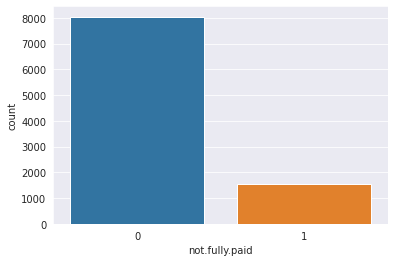

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

In [ ]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [ ]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [ ]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [ ]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


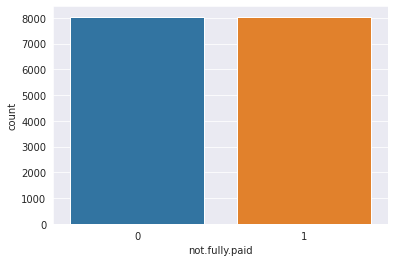

In [ ]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

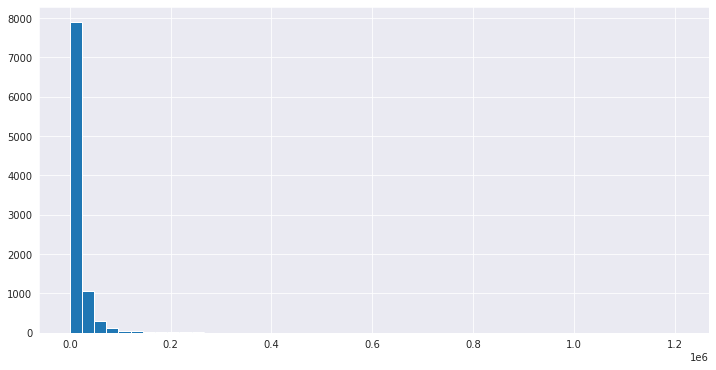

In [ ]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [ ]:
df1=pd.get_dummies(df, columns=['purpose'])

Text(0.5, 0, 'FICO')

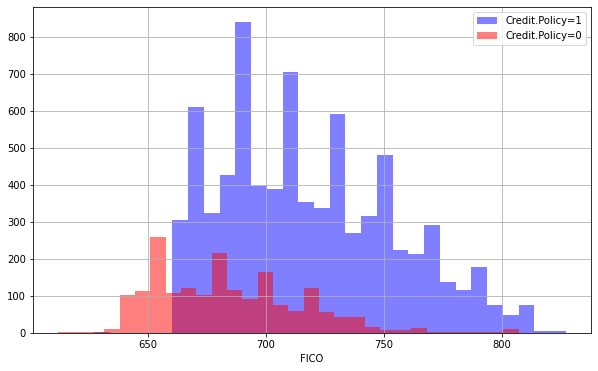

In [ ]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

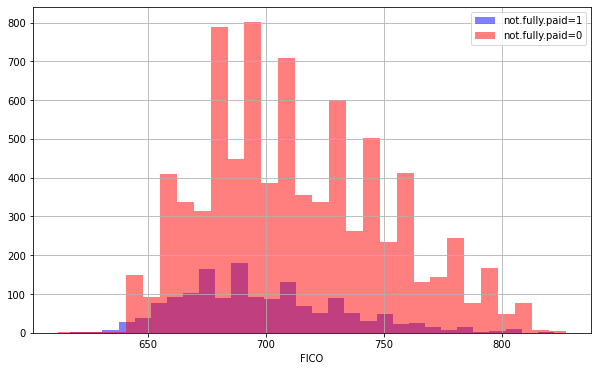

In [ ]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

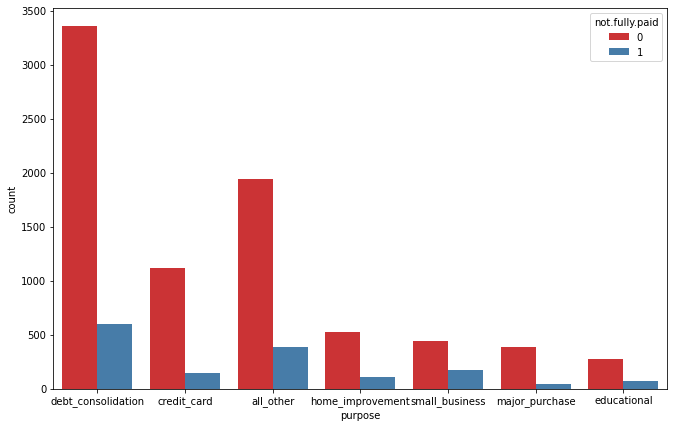

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

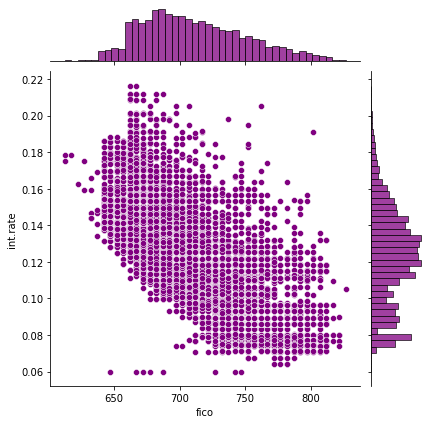

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

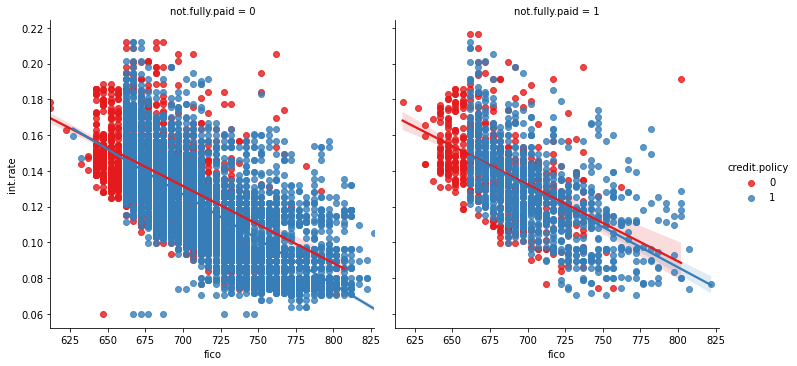

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [ ]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [ ]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 182
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         16090

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.297823,0.051720,0.017306,-0.115743,0.381174,0.094415,-0.196850,-0.111472,-0.550498,-0.049842,-0.062145,-0.191957,0.011830,0.016604,-0.044384,0.007923,0.038807,-0.010269
int.rate,-0.297823,1.000000,0.276784,0.079726,0.212696,-0.682043,-0.105674,0.084220,0.425322,0.186856,0.140727,0.109875,0.214618,-0.043927,0.087384,-0.012696,-0.040770,-0.069206,0.179082
installment,0.051720,0.276784,1.000000,0.475839,0.025765,0.099373,0.173349,0.262401,0.056755,-0.023376,0.001067,-0.024805,0.054657,0.006334,0.108572,-0.089165,0.035369,-0.048940,0.189898
log.annual.inc,0.017306,0.079726,0.475839,1.000000,-0.029029,0.109645,0.339417,0.402420,0.071466,0.038108,0.012692,0.015813,-0.049353,0.080521,-0.040538,-0.124818,0.108532,-0.029034,0.129374
dti,-0.115743,0.212696,0.025765,-0.029029,1.000000,-0.230042,0.091284,0.180716,0.327835,0.038546,-0.043627,0.020912,0.047659,0.074282,0.180988,-0.038983,-0.096849,-0.081550,-0.072319
fico,0.381174,-0.682043,0.099373,0.109645,-0.230042,1.000000,0.257190,0.008128,-0.508692,-0.193631,-0.198609,-0.161679,-0.209924,-0.005327,-0.147663,-0.018454,0.093730,0.068743,0.071630
days.with.cr.line,0.094415,-0.105674,0.173349,0.339417,0.091284,0.257190,1.000000,0.263218,0.017606,-0.027085,0.072671,0.065443,-0.038185,0.060660,-0.012240,-0.050879,0.074358,-0.021521,0.040086
revol.bal,-0.196850,0.084220,0.262401,0.402420,0.180716,0.008128,0.263218,1.000000,0.182388,0.032254,-0.036166,-0.038701,0.061865,0.062449,-0.010192,-0.033710,-0.009100,-0.058115,0.100754
revol.util,-0.111472,0.425322,0.056755,0.071466,0.327835,-0.508692,0.017606,0.182388,1.000000,-0.024732,-0.052280,0.083530,0.111527,0.093349,0.193018,-0.063756,-0.112292,-0.114816,-0.058217
inq.last.6mths,-0.550498,0.186856,-0.023376,0.038108,0.038546,-0.193631,-0.027085,0.032254,-0.024732,1.000000,0.010637,0.100161,0.176185,-0.043535,-0.053166,0.043586,0.050534,0.001085,0.037138


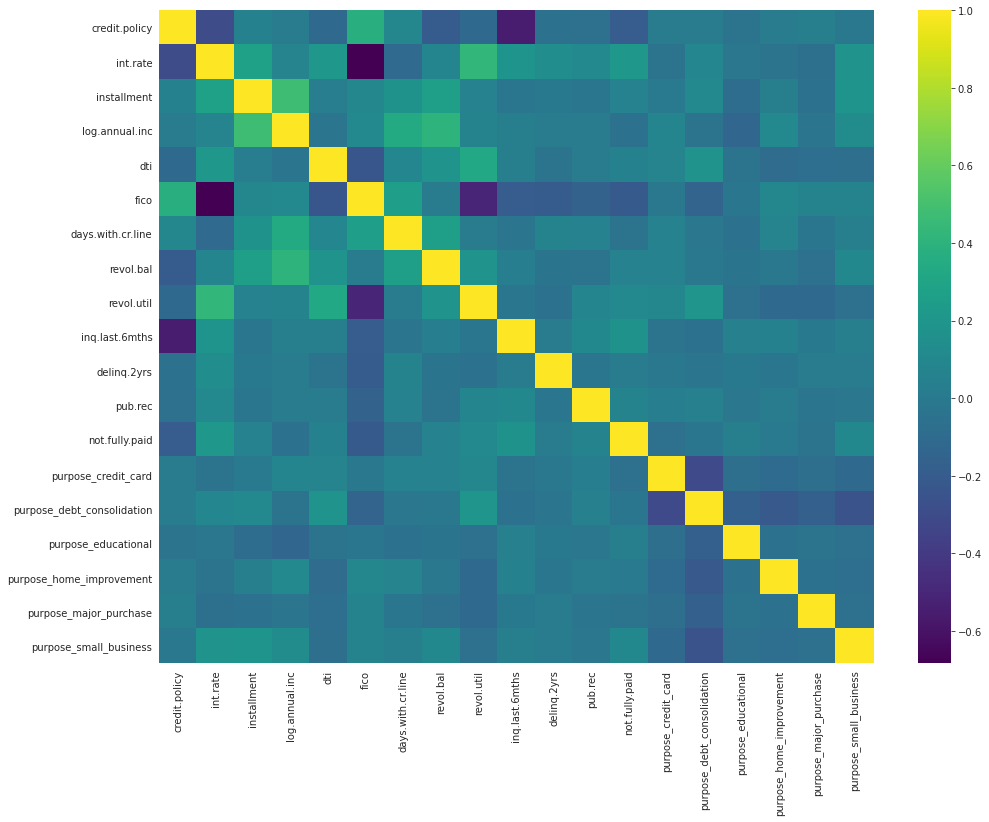

In [ ]:
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [ ]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment can repsent by annual income. revol.util can repsent by int.rate,  

In [ ]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [ ]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [ ]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(11263, 15)

In [ ]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.6018 - val_loss: 0.6586 - val_accuracy: 0.6041
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6140 - val_loss: 0.6552 - val_accuracy: 0.6043
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.6217 - val_loss: 0.6557 - val_accuracy: 0.6140
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6213 - val_loss: 0.6515 - val_accuracy: 0.6093
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6238 - val_loss: 0.6510 - val_accuracy: 0.6147
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6225 - val_loss: 0.6489 - val_accuracy: 0.6140
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6276 - val_loss: 0.6484 - val_accuracy: 0.6190
Epoch 8/200
4

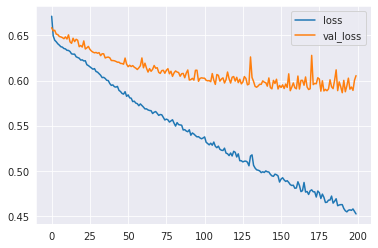

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

In [ ]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

[[1595  842]
 [ 624 1766]] 
               precision    recall  f1-score   support

           0       0.72      0.65      0.69      2437
           1       0.68      0.74      0.71      2390

    accuracy                           0.70      4827
   macro avg       0.70      0.70      0.70      4827
weighted avg       0.70      0.70      0.70      4827



In [ ]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6840 - binary_accuracy: 0.5617 - val_loss: 0.6701 - val_binary_accuracy: 0.6066
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_accuracy: 0.6039 - val_loss: 0.6605 - val_binary_accuracy: 0.6020
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6563 - binary_accuracy: 0.6139 - val_loss: 0.6566 - val_binary_accuracy: 0.6039
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6560 - binary_accuracy: 0.6113 - val_loss: 0.6559 - val_binary_accuracy: 0.6147
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6527 - binary_accuracy: 0.6148 - val_loss: 0.6534 - val_binary_accuracy: 0.6130
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6496 - binary_accuracy: 0.6224 - val_loss: 0.6524 - val_binary_accuracy: 0.6151
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

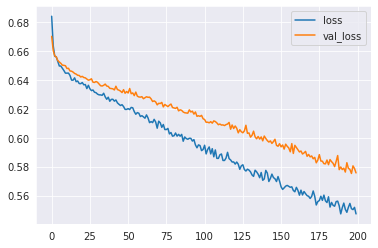

In [ ]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() #The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model

In [ ]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

Instructions for updating:
Please use `model.predict()` instead.
[[ 522 1915]
 [  53 2337]] 
               precision    recall  f1-score   support

           0       0.91      0.21      0.35      2437
           1       0.55      0.98      0.70      2390

    accuracy                           0.59      4827
   macro avg       0.73      0.60      0.53      4827
weighted avg       0.73      0.59      0.52      4827



In [ ]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

In [ ]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')



In [ ]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)
